<a href="https://colab.research.google.com/github/hscrown/seoul_pr/blob/main/collaborative_filtering_%EC%97%B0%EC%8A%B5(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유클리디안 거리 - 3개이상의 아이템으로 유사도 도출


다차원간 거리를 구하는 데 사용되는 공식들은
Euclidean distance
City-block(Manhattan) distance
Minkowski distance
Cosine distance
Jaccard's distance 등등이 있다.


# 유클리디안 거리 공식

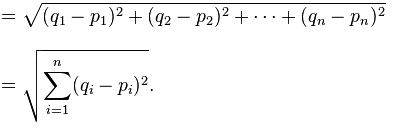![image.png](
  

)

피타고라스랑 기본적으로 유사하다. X-Y값의 제곱을 모두 구해 더한다음 제곱근을 취한다 ㅇㅇ


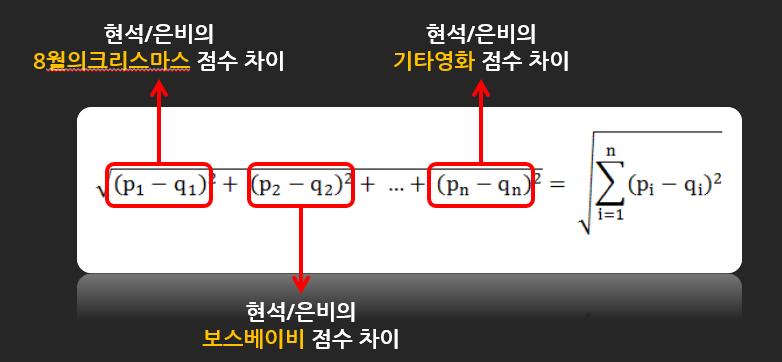

# 데이터 정의

In [1]:


# 이중 딕셔너리 구조로 데이터를 만들어준다.
critics={
     'hermione':{'guardians of the galaxy 2':5,'christmas in august':4,'boss baby':1.5},
     'chris':{'christmas in august':5,'boss baby':2},
     'harry':{'guardians of the galaxy 2':2.5,'christmas in august':2,'boss baby':1},
     'molly':{'guardians of the galaxy 2':3.5,'christmas in august':4,'boss baby':5}
}


# 유클리디안 거리공식을 통한 다차원에서 두사람간 거리구하기

In [4]:
from math import sqrt
# 유클리디안 거리공식을 함수로 정의
def euclidean_dist(data, name1, name2):
    sum = 0
    for i in data[name1]: # 크리스가 본 영화들을 하나씩 꺼내보는데,
      if i in data[name2]: # 꺼낸 영화가 해리도 본 영화이면 # 같은 영화를 봤다면
        sum += pow(data[name1][i] - data[name2][i],2) # 거리 구하기 # 크리스평점에서 해리평점을 빼서
    return 1/(1+sqrt(sum)) # 거리 구하고 정규화값 리턴ㅠ

In [5]:
# 위의 함수를 이용해 크리스와 해리의 유사도를 구하면:

euclidean_dist(critics, 'chris', 'harry')

0.2402530733520421

# 전체데이터에서 크리스랑 가장 가까운 사람 구하기

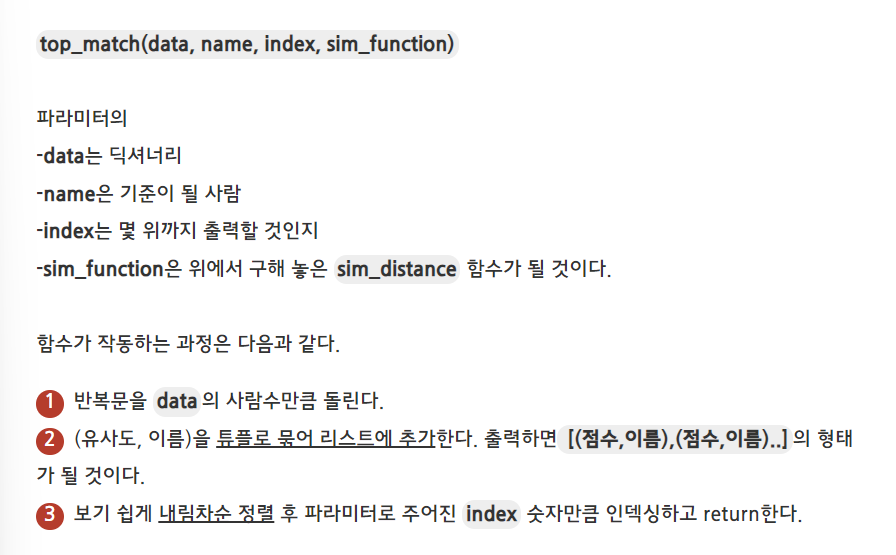

In [31]:
def top_match(data,name,index=3,sim_function=euclidean_dist):
  li=[]
  for i in data: # 한 명씩 꺼내오는데
    if name !=i: # 자기 자신은 제외한다.
      # 유사도와 이름을 튜플로 묶어서 리스트에 추가
      li.append((sim_function(data,name,i),i))

  # 유사도를 기준으로 내림차순 정렬
  li.sort(reverse=True)


  return li[:index]


In [32]:
top_match(critics,'chris') # 헤르미온느가 크리스랑 가장 거리가 가까움.

[(0.4721359549995794, 'hermione'),
 (0.2402530733520421, 'molly'),
 (0.2402530733520421, 'harry')]

# 시각화

In [29]:
import matplotlib.pyplot as plt
# 시각화 함수 정의

# data: 점수가 들어있는 리스트, labels:이름이 들어있는 리스트

def barchart(data,labels):
  positions = range(len(data))
  plt.barh(positions, data, height=0.5,color='r') #가로
  plt.yticks(positions, labels)
  plt.xlabel('similarity')
  plt.ylabel('names')
  plt.title('similarity visualize')
  plt.show()

In [33]:
# 시각화 함수에 파라미터로 들어갈 점수와 이름 구하기
# 크리스의 리스트
chris_list = top_match(critics,'chris')

score = []
names = []

for i in chris_list:
  score.append(i[0])
  names.append(i[1])

score

NameError: name 'li' is not defined

In [18]:
names

['hermione', 'molly', 'harry']

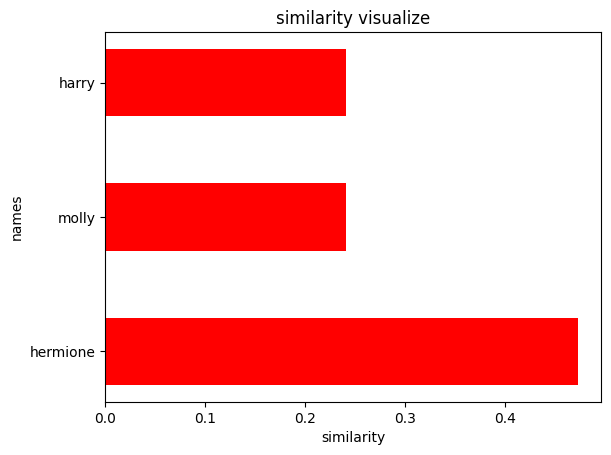

In [30]:
barchart(score,names)